# tensorflow 搭建 cifar10分类模型

In [1]:
import tensorflow as tf
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']   # 解决图表中文乱码问题
plt.rcParams['axes.unicode_minus'] = False     # 用来正常显示负号

2024-04-02 20:59:17.130425: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 加载数据

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

In [3]:
print('\n train_x:%s, train_y:%s, test_x:%s, test_y:%s'%(train_x.shape,train_y.shape,test_x.shape,test_y.shape)) 


 train_x:(50000, 32, 32, 3), train_y:(50000, 1), test_x:(10000, 32, 32, 3), test_y:(10000, 1)


## 数据预处理

In [4]:
X_train,X_test = tf.cast(train_x/255.0,tf.float32),tf.cast(test_x/255.0,tf.float32) # 归一化
y_train,y_test = tf.cast(train_y,tf.int16),tf.cast(test_y,tf.int16)

## 建立模型

In [5]:
model = tf.keras.Sequential()

### 第一层

In [6]:
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation=tf.nn.relu, data_format='channels_last',
                           input_shape=X_train.shape[1:]))  # 卷积层，16个卷积核，大小（3，3），保持原图像大小，relu激活函数，输入形状（28，28，1）
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))  # 池化层，最大值池化，卷积核（2，2）

/Users/sunwenjun/anaconda3/envs/python310/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### 第二层

In [7]:
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

### 第三层 分类识别阶段

In [8]:
model.add(tf.keras.layers.Flatten())  # 改变输入形状

### 第四层

In [9]:
model.add(tf.keras.layers.Dense(128, activation='relu'))  # 全连接网络层，128个神经元，relu激活函数
model.add(tf.keras.layers.Dense(10, activation='softmax'))  # 输出层，10个节点
print(model.summary())  # 查看网络结构和参数信息

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 280,218 (1.07 MB)

 Trainable params: 280,218 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

None


## 配置模型训练方法

In [10]:
# adam算法参数采用keras默认的公开参数，损失函数采用稀疏交叉熵损失函数，准确率采用稀疏分类准确率函数
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

## 训练模型

In [11]:
# 批量训练大小为64，迭代5次，测试集比例0.2（48000条训练集数据，12000条测试集数据）
history = model.fit(X_train, y_train, batch_size=64, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 62ms/step - loss: 1.7675 - sparse_categorical_accuracy: 0.3529 - val_loss: 1.2512 - val_sparse_categorical_accuracy: 0.5551
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - loss: 1.1724 - sparse_categorical_accuracy: 0.5818 - val_loss: 1.0434 - val_sparse_categorical_accuracy: 0.6342
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - loss: 0.9732 - sparse_categorical_accuracy: 0.6559 - val_loss: 0.9869 - val_sparse_categorical_accuracy: 0.6602
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - loss: 0.8343 - sparse_categorical_accuracy: 0.7101 - val_loss: 0.9070 - val_sparse_categorical_accuracy: 0.6858
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - loss: 0.7530 - sparse_categorical_accuracy: 0.7344 - val_loss: 0.8628 - val_sparse_categorical_accuracy: 0.7035


## 评估模型

In [12]:
model.evaluate(X_test, y_test, verbose=2)  # 每次迭代输出一条记录，来评价该模型是否有比较好的泛化能力

313/313 - 2s - 7ms/step - loss: 0.8679 - sparse_categorical_accuracy: 0.6981


[0.8679482936859131, 0.6980999708175659]

## 保存整个模型

In [13]:
model.save('CIFAR10_CNN_weights.h5')

## 结果可视化

In [14]:
print(history.history)
loss = history.history['loss']  # 训练集损失
val_loss = history.history['val_loss']  # 测试集损失
acc = history.history['sparse_categorical_accuracy']  # 训练集准确率
val_acc = history.history['val_sparse_categorical_accuracy']  # 测试集准确率

{'loss': [1.5255502462387085, 1.1288119554519653, 0.9516567587852478, 0.8312733173370361, 0.7449873685836792], 'sparse_categorical_accuracy': [0.4489000141620636, 0.5985249876976013, 0.6650500297546387, 0.7122499942779541, 0.7397000193595886], 'val_loss': [1.2511869668960571, 1.0434167385101318, 0.9868698716163635, 0.9070087671279907, 0.8627633452415466], 'val_sparse_categorical_accuracy': [0.5551000237464905, 0.6341999769210815, 0.6601999998092651, 0.6858000159263611, 0.703499972820282]}


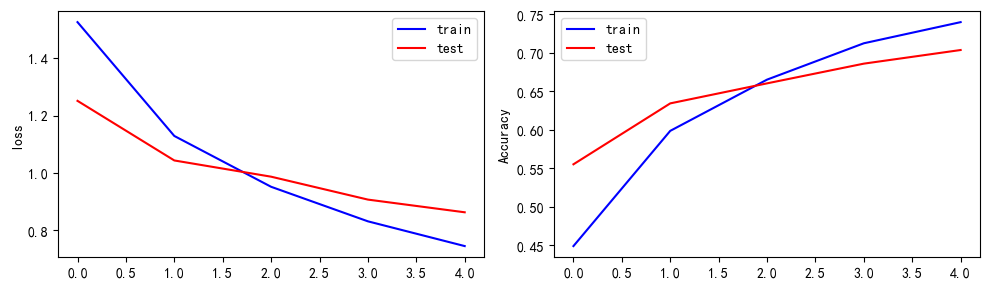

In [15]:
plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.plot(loss, color='b', label='train')
plt.plot(val_loss, color='r', label='test')
plt.ylabel('loss')
plt.legend()

plt.subplot(122)
plt.plot(acc, color='b', label='train')
plt.plot(val_acc, color='r', label='test')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout() # 调整布局，增加两个子图之间的距离

## 使用模型

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


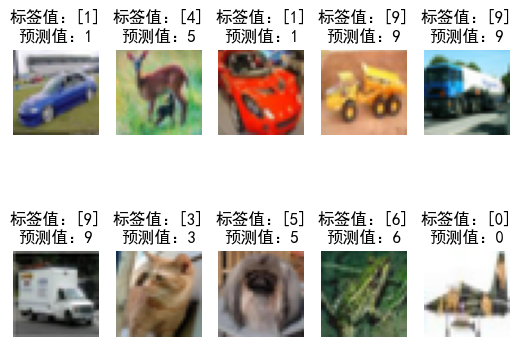

In [16]:
plt.figure()
for i in range(10):
    num = np.random.randint(1, 10000)

    plt.subplot(2, 5, i + 1)
    plt.axis('off')
    plt.imshow(test_x[num], cmap='gray')
    demo = tf.reshape(X_test[num], (1, 32, 32, 3))
    y_pred = np.argmax(model.predict(demo))
    plt.title('标签值：' + str(test_y[num]) + '\n预测值：' + str(y_pred))

In [17]:
y_pred = np.argmax(model.predict(X_test[0:10]),axis=1)
print('X_test[0:10]: %s'%(X_test[0:10].shape))
print('y_pred: %s'%(y_pred))
print('y_test[0:10]:%s'%(tf.reshape(y_test[0:10],[10])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
X_test[0:10]: (10, 32, 32, 3)
y_pred: [3 1 8 0 6 6 1 4 3 1]
y_test[0:10]:tf.Tensor([3 8 8 0 6 6 1 6 3 1], shape=(10,), dtype=int16)
